#### Viernes 25 de Abril de 2025

## Árbol de Decisión CART. ¿Jugar o no Jugar?

#### Librerías

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree # Para crear el árbol de decisión
from sklearn.model_selection import train_test_split # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import accuracy_score # Para calcular la precisión del modelo
from sklearn.preprocessing import LabelEncoder # Para normalizar los datos (Convertir categorías a números)
import matplotlib.pyplot as plt

#### Carga de datos

In [8]:
#Datos de ejemplo: ¿Jugar tenis? (14 días)
data = {
    'Cielo': ['Soleado', 'Soleado', 'Nublado', 'Lluvioso', 'Lluvioso', 'Lluvioso', 'Nublado', 'Soleado', 'Soleado', 'Lluvioso', 
              'Soleado', 'Nublado', 'Nublado', 'Lluvioso'],
    'Humedad': ['Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Alta', 'Normal', 'Alta', 'Normal', 'Normal', 'Normal', 
                'Alta', 'Normal', 'Alta'],
    'Viento': ['Débil', 'Fuerte', 'Débil', 'Débil', 'Fuerte', 'Débil', 'Fuerte', 'Débil', 'Débil', 'Débil', 'Fuerte', 
               'Fuerte', 'Débil', 'Fuerte'],
    'Jugar': ['No', 'No', 'Sí', 'Sí', 'No', 'Sí', 'Sí', 'No', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'No']
}

df = pd.DataFrame(data)
print("Dataset original:")
df

Dataset original:


,Cielo,Humedad,Viento,Jugar
0,Soleado,Alta,Débil,No
1,Soleado,Alta,Fuerte,No
2,Nublado,Alta,Débil,Sí
3,Lluvioso,Normal,Débil,Sí
4,Lluvioso,Normal,Fuerte,No
5,Lluvioso,Alta,Débil,Sí
6,Nublado,Normal,Fuerte,Sí
7,Soleado,Alta,Débil,No
8,Soleado,Normal,Débil,Sí
9,Lluvioso,Normal,Débil,Sí


#### Preprocesar los datos

In [16]:
label_encoders =  {} #Crea un codificador para cada columna
df_encoded = df.copy() #Copia el DataFrame original

for column in df.columns:
    le = LabelEncoder() #Crear un codificador de etiquetas
    df_encoded[column] = le.fit_transform(df[column]) #Codificar la columna
    label_encoders[column] = le #Guardar el codificador para usarlo más tarde 
print("\nDataset codificado:")
df_encoded


Dataset codificado:


,Cielo,Humedad,Viento,Jugar
0,2,0,0,0
1,2,0,1,0
2,1,0,0,1
3,0,1,0,1
4,0,1,1,0
5,0,0,0,1
6,1,1,1,1
7,2,0,0,0
8,2,1,0,1
9,0,1,0,1


#### Dividir Datos de Entrenamiento y Prueba

In [19]:
X = df_encoded.drop('Jugar', axis=1) #Todas las columnas excepto la columna 'Jugar'
y = df_encoded['Jugar'] #Solo la columna 'Jugar'

#Dividir el dataset en conjunto de entrenamiento(70%) y prueba(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDatos de entrenamiento: \n")
print(X_train)
print("\nDatos de prueba: \n")
print(X_test)


Datos de entrenamiento: 

    Cielo  Humedad  Viento
8       2        1       0
2       1        0       0
1       2        0       1
13      0        0       1
4       0        1       1
7       2        0       0
10      2        1       1
3       0        1       0
6       1        1       1

Datos de prueba: 

    Cielo  Humedad  Viento
9       0        1       0
11      1        0       1
0       2        0       0
12      1        1       0
5       0        0       0


#### Entrenar Árbol de Decisión

In [20]:
# Crear y entrenar el modelo
model = DecisionTreeClassifier(
    criterion = 'gini', #Métrica para dividir nodos
    max_depth = 3, #Profundidad máxima del árbol
    random_state = 42
)
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)
print("\nPredicciones: \n")
print(y_pred)

#Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred) 
print(f"\nPrecisión del modelo: {accuracy:.2f}")


Predicciones: 

[1 0 0 1 1]

Precisión del modelo: 0.80


#### Visualizar el Árbol

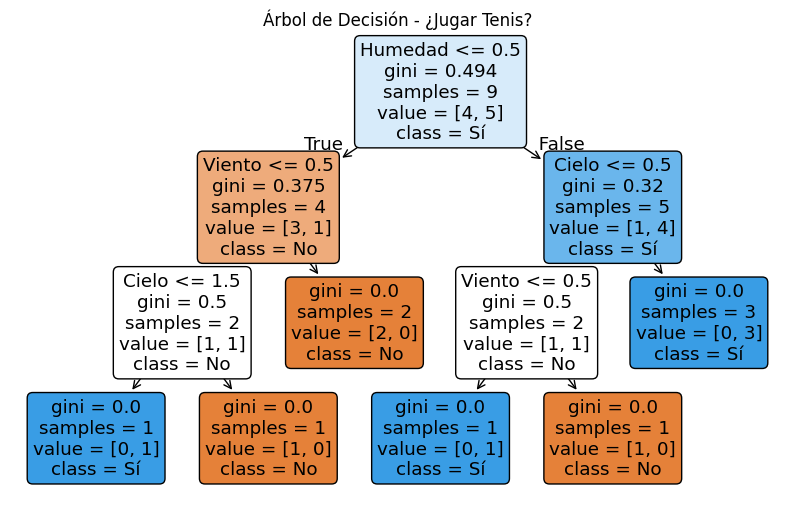

In [23]:
plt.figure(figsize=(10,6))
plot_tree(
    model, 
    feature_names=X.columns, # Nombres de las columnas
    class_names=['No', 'Sí'], # Nombres de las clases (Jugar=0 -> 'No')
    filled=True, # Colorear por clase
    rounded=True, # Forma de los nodos
    impurity=True # Mostrar impureza (Gini)
)

plt.title("Árbol de Decisión - ¿Jugar Tenis?")
plt.show()

#### Hacer predicciones

In [50]:
print("PREDICCIÓN BADASA EN EL MODELO\n")

# Ejemplo de predicción
nuevos_datos = {
    'Cielo': 1,
    'Humedad': 0.3,
    'Viento': 0.5
}

nuevo_df = pd.DataFrame([nuevos_datos])
print("Datos de predicción: \n")
print(nuevo_df)

prediction = model.predict(nuevo_df)

print("\nPredicción para el nuevo dato:")
if prediction[0] == 1:
    print("Si deben jugar")
else:
    print("No deden jugar")


PREDICCIÓN BADASA EN EL MODELO

Datos de predicción: 

   Cielo  Humedad  Viento
0      1      0.3     0.5

Predicción para el nuevo dato:
Si deben jugar
